In [49]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))

from plots import *
import misc

import pandas as pd
import georinex as gr
from plots import *
import copy

from logparser import LogReader, PosReader, RinexReader

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prepare the data

In [50]:
# Load log files
folder = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/S3/A2"

device_list = ['GP7', 'GPW', 'A52', 'SW6']
logs = {}
for device in device_list:
    logs[device] = LogReader(manufacturer="", device="", acronym=device, specifiedTags='Fix', filepath=f"{folder}/{device}/Fix.csv")


In [51]:
# only keep GPS provider
# log.fix = log.fix.loc[log.fix["provider"] == 'GPS']\

In [52]:
logs['A52'].fix

,provider,timestamp,latitude,longitude,altitude,unixTime,elapsedTime
datetime,,,,,,,
2024-03-14 09:47:10.152,FUSED,1.710410e+09,47.217697,-1.542448,75.255,1.710410e+12,2.288445e+14
2024-03-14 09:47:11.153,FUSED,1.710410e+09,47.217697,-1.542448,75.255,1.710410e+12,2.288455e+14
2024-03-14 09:47:12.154,FUSED,1.710410e+09,47.217697,-1.542448,75.255,1.710410e+12,2.288465e+14
2024-03-14 09:47:13.153,FUSED,1.710410e+09,47.217697,-1.542448,75.255,1.710410e+12,2.288475e+14
2024-03-14 09:47:14.000,GPS,1.710410e+09,47.217699,-1.542449,75.011,1.710410e+12,2.288480e+14
...,...,...,...,...,...,...,...
2024-03-14 09:57:46.000,GPS,1.710410e+09,47.217724,-1.542580,62.662,1.710410e+12,2.294800e+14
2024-03-14 09:57:46.608,FUSED,1.710410e+09,47.217724,-1.542580,62.662,1.710410e+12,2.294809e+14
2024-03-14 09:57:47.000,GPS,1.710410e+09,47.217725,-1.542580,62.671,1.710410e+12,2.294810e+14


# Results

In [53]:
center = [47.2169, -1.5426]
extent = [center[1] - 0.0015, center[1] + 0.0015, center[0] - 0.001, center[0] + 0.001]

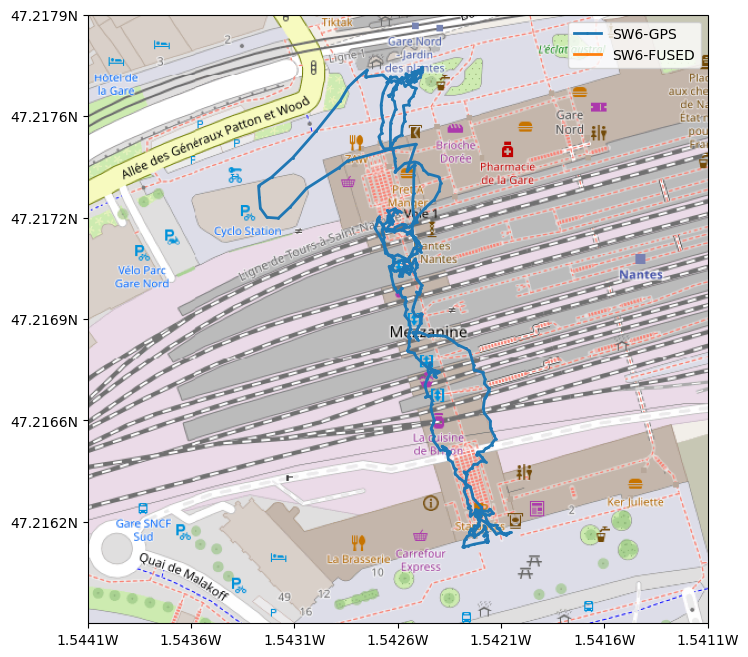

In [57]:
locations = {}

# log = logs['GP7']
# provider = 'GPS'
# locations[f"{log.acronym}-{provider}"] = log.fix.loc[log.fix['provider'].isin([provider]), ["latitude", "longitude"]]

# log = logs['GPW']
# provider = 'FUSED'
# locations[f"{log.acronym}-{provider}"] = log.fix.loc[log.fix['provider'].isin([provider]), ["latitude", "longitude"]]

log = logs['SW6']
provider = 'GPS'
locations[f"{log.acronym}-{provider}"] = log.fix.loc[log.fix['provider'].isin([provider]), ["latitude", "longitude"]]
provider = 'FUSED'
locations[f"{log.acronym}-{provider}"] = log.fix.loc[log.fix['provider'].isin([provider]), ["latitude", "longitude"]]

# log = logs['SW6']
# provider = 'GPS'
# locations[f"{log.acronym}-{provider}"] = log.fix.loc[log.fix['provider'].isin([provider]), ["latitude", "longitude"]]

plotMap(locations=locations, extent=extent, marker='o', scale=18)